# DeepLab 
## Training DeepLab with MobileNet

In [ ]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

helper_path = os.path.abspath(os.path.join('../helper'))
if helper_path not in sys.path:
    sys.path.append(helper_path)

In [1]:
from helper.models.config import *
from helper.models.deeplab_mobilenet import *
from helper.data.dataobj import DrainageDataset
from torch.utils.data import DataLoader
from helper.data.dataobj import DrainageDataset
from sklearn.model_selection import train_test_split
from helper.utilities import *
from helper.callbacks.logs import save_history_callback, save_resulting_callback
from helper.callbacks.visualize import *
from transformers import logging
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
logging.set_verbosity_error()

## Setting model

In [2]:
device = 'cuda'
deeplab_model = DeepLab()

Initialized DeepLabV3


In [3]:
config_deeplab = Config(
    model=deeplab_model,
    num_epochs=200,
    opt='Adam',
    lr=1e-4
)
print(config_deeplab.get_params())

{'num_epochs': 200, 'batch_size': 64, 'opt': 'Adam', 'crit': 'CrossEntropy', 'learning_rate': 0.0001}


## Dataset

In [12]:
images = np.load('../helper/data/datasets/new_images.npy').astype(np.uint8)
masks = np.load('../helper/data/datasets/new_masks.npy')

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print('Getting test dataset')
bins = [get_bin(mask) for mask in masks]

train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=test_ratio, stratify=bins, random_state=42)

print('Getting train and val datasets')
bins = [get_bin(mask) for mask in train_masks]
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=val_ratio / (train_ratio + test_ratio), stratify=bins, random_state=42)

train_dataset = DrainageDataset(train_images, train_masks, device=device, mode='test')
val_dataset = DrainageDataset(val_images, val_masks, device=device, mode='test')
test_dataset = DrainageDataset(test_images, test_masks, device=device, mode='test')

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

drainage_dataloader = {'train': train_dataloader, 'validate': val_dataloader}

Getting test dataset
Getting train and val datasets


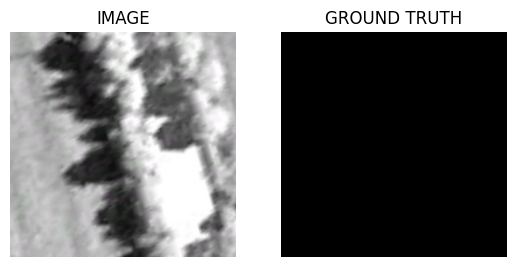

In [24]:
train_dataset.show(0, processed=True)

## Training and testing model

### Training model

Training model DeepLabV3 - 1 using cuda


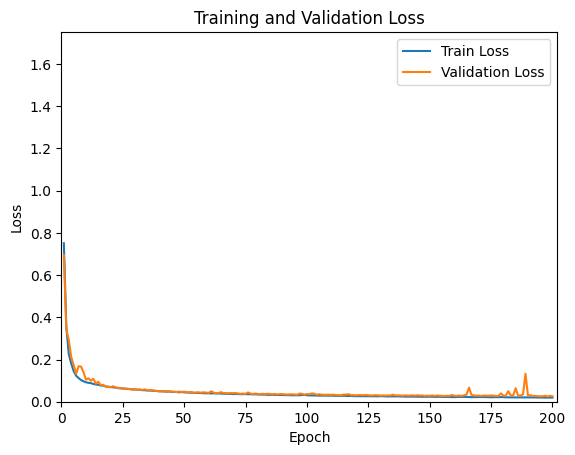

epoch:   0%|          | 1/200 [00:43<2:24:42, 43.63s/it]

Epoch 0: train_loss 0.7509856961792968, train_iou 0.016928402706980705,  val_loss 0.6942606254290509, val_iou 0.016421817243099213


epoch:   1%|          | 2/200 [01:13<1:57:49, 35.70s/it]

epoch:   2%|▏         | 3/200 [01:43<1:47:59, 32.89s/it]

Epoch 2: train_loss 0.22558922428474684, train_iou 0.0039504170417785645,  val_loss 0.29265379809564157, val_iou 0.02637229487299919


epoch:   2%|▏         | 4/200 [02:13<1:43:26, 31.67s/it]

Epoch 3: train_loss 0.18106836183906003, train_iou 0.002674852265045047,  val_loss 0.21209047173941006, val_iou 0.005040876101702452


epoch:   2%|▎         | 5/200 [02:42<1:40:14, 30.85s/it]

Epoch 4: train_loss 0.14470578462186487, train_iou 0.0009888443164527416,  val_loss 0.17396045900801177, val_iou 0.017093002796173096


epoch:   3%|▎         | 6/200 [03:11<1:37:54, 30.28s/it]

Epoch 5: train_loss 0.12296869069438189, train_iou 0.0009519527666270733,  val_loss 0.13157915444143356, val_iou 0.0


epoch:   4%|▎         | 7/200 [03:41<1:36:27, 29.99s/it]

Epoch 6: train_loss 0.11234513828248689, train_iou 8.833149331621826e-05,  val_loss 0.1683270671675282, val_iou 0.01563071273267269


epoch:   4%|▍         | 8/200 [04:10<1:35:23, 29.81s/it]

Epoch 7: train_loss 0.10247010525428887, train_iou 0.00019470139523036778,  val_loss 0.16624592100420305, val_iou 0.02320423722267151


epoch:   4%|▍         | 9/200 [04:39<1:34:27, 29.67s/it]

Epoch 8: train_loss 0.09665939801871175, train_iou 0.0003806676249951124,  val_loss 0.14023464020862375, val_iou 0.014821168035268784


epoch:   5%|▌         | 10/200 [05:09<1:33:52, 29.65s/it]

Epoch 9: train_loss 0.09218640149843813, train_iou 0.0,  val_loss 0.10478587096096367, val_iou 0.0


epoch:   6%|▌         | 11/200 [05:39<1:33:20, 29.63s/it]

Epoch 10: train_loss 0.08945969826344288, train_iou 9.79417163762264e-05,  val_loss 0.1110483054672518, val_iou 0.011780424043536186


epoch:   6%|▌         | 12/200 [06:09<1:33:09, 29.73s/it]

Epoch 11: train_loss 0.08810937930437852, train_iou 0.0006918701692484319,  val_loss 0.09958882525723467, val_iou 0.009794151410460472


epoch:   6%|▋         | 13/200 [06:38<1:32:20, 29.63s/it]

Epoch 12: train_loss 0.08414485428971473, train_iou 1.2483741556934547e-05,  val_loss 0.1089798221665044, val_iou 0.014392665587365627


epoch:   7%|▋         | 14/200 [07:07<1:31:26, 29.50s/it]

Epoch 13: train_loss 0.08151744779211904, train_iou 7.82865536166355e-05,  val_loss 0.08559670747928722, val_iou 0.0


epoch:   8%|▊         | 15/200 [07:37<1:31:24, 29.64s/it]

Epoch 14: train_loss 0.08014085405703747, train_iou 0.0,  val_loss 0.09502548964754227, val_iou 0.010108180344104767


epoch:   8%|▊         | 16/200 [08:07<1:30:42, 29.58s/it]

Epoch 15: train_loss 0.07715206106604149, train_iou 5.1182018069084734e-05,  val_loss 0.07854096415222332, val_iou 0.0


epoch:   8%|▊         | 17/200 [08:36<1:30:12, 29.57s/it]

Epoch 16: train_loss 0.07637433595328219, train_iou 0.0009939282899722457,  val_loss 0.08062534987606028, val_iou 0.005654509179294109


epoch:   9%|▉         | 18/200 [09:05<1:29:32, 29.52s/it]

Epoch 17: train_loss 0.07259464490694631, train_iou 0.005534776486456394,  val_loss 0.0712261619747326, val_iou 0.010923696681857109


epoch:  10%|▉         | 19/200 [09:35<1:28:55, 29.48s/it]

Epoch 18: train_loss 0.0712489836946481, train_iou 0.009978162124752998,  val_loss 0.0705104828361542, val_iou 0.013654574751853943


epoch:  10%|█         | 20/200 [10:04<1:28:22, 29.46s/it]

Epoch 19: train_loss 0.0702616267784276, train_iou 0.02022671326994896,  val_loss 0.06831957960641512, val_iou 0.042679525911808014


epoch:  10%|█         | 21/200 [10:34<1:27:47, 29.43s/it]

Epoch 20: train_loss 0.06829647558807123, train_iou 0.03324439376592636,  val_loss 0.07339025192683743, val_iou 0.07210269570350647


epoch:  11%|█         | 22/200 [11:03<1:27:16, 29.42s/it]

Epoch 21: train_loss 0.06665357304141176, train_iou 0.03308086097240448,  val_loss 0.06832761870276544, val_iou 0.11028075218200684


epoch:  12%|█▏        | 23/200 [11:32<1:26:34, 29.35s/it]

Epoch 22: train_loss 0.0654731245830605, train_iou 0.046215515583753586,  val_loss 0.06400701011060386, val_iou 0.09859232604503632


epoch:  12%|█▏        | 24/200 [12:02<1:26:18, 29.42s/it]

Epoch 23: train_loss 0.06382878017345262, train_iou 0.06489074230194092,  val_loss 0.0643603261760486, val_iou 0.08254390954971313


epoch:  12%|█▎        | 25/200 [12:32<1:26:29, 29.65s/it]

Epoch 24: train_loss 0.06245765286663967, train_iou 0.07309315353631973,  val_loss 0.06169464463187802, val_iou 0.13262097537517548


epoch:  13%|█▎        | 26/200 [13:01<1:25:48, 29.59s/it]

Epoch 25: train_loss 0.06179814707450192, train_iou 0.09207623451948166,  val_loss 0.06184136555079491, val_iou 0.15832771360874176


epoch:  14%|█▎        | 27/200 [13:31<1:25:15, 29.57s/it]

Epoch 26: train_loss 0.06045035638090737, train_iou 0.09894074499607086,  val_loss 0.06142720972658486, val_iou 0.17007283866405487


epoch:  14%|█▍        | 28/200 [14:00<1:24:16, 29.40s/it]

Epoch 27: train_loss 0.059329826281929655, train_iou 0.11320041865110397,  val_loss 0.06004940301820796, val_iou 0.1484583169221878


epoch:  14%|█▍        | 29/200 [14:29<1:23:36, 29.34s/it]

Epoch 28: train_loss 0.058079098814766014, train_iou 0.11080855131149292,  val_loss 0.05724609787425687, val_iou 0.16565868258476257


epoch:  15%|█▌        | 30/200 [14:58<1:23:00, 29.30s/it]

Epoch 29: train_loss 0.05859325376624611, train_iou 0.1085129827260971,  val_loss 0.0579931535708007, val_iou 0.16283193230628967


epoch:  16%|█▌        | 31/200 [15:29<1:23:16, 29.57s/it]

Epoch 30: train_loss 0.0570330715992234, train_iou 0.1266411393880844,  val_loss 0.05678026870854439, val_iou 0.16994881629943848


epoch:  16%|█▌        | 32/200 [15:58<1:22:58, 29.63s/it]

Epoch 31: train_loss 0.056369035718617615, train_iou 0.1281670331954956,  val_loss 0.0579380845671059, val_iou 0.18457648158073425


epoch:  16%|█▋        | 33/200 [16:28<1:22:05, 29.49s/it]

Epoch 32: train_loss 0.05462297027560597, train_iou 0.14606225490570068,  val_loss 0.05568023250308088, val_iou 0.17173394560813904


epoch:  17%|█▋        | 34/200 [16:57<1:21:51, 29.59s/it]

Epoch 33: train_loss 0.05470676170505257, train_iou 0.146966814994812,  val_loss 0.05887511140236291, val_iou 0.16994750499725342


epoch:  18%|█▊        | 35/200 [17:27<1:21:12, 29.53s/it]

Epoch 34: train_loss 0.053071908321645524, train_iou 0.1532774120569229,  val_loss 0.053249233592582004, val_iou 0.2060604989528656


epoch:  18%|█▊        | 36/200 [17:56<1:20:35, 29.48s/it]

Epoch 35: train_loss 0.05320357564924542, train_iou 0.16368085145950317,  val_loss 0.054047517077897185, val_iou 0.17715495824813843


epoch:  18%|█▊        | 37/200 [18:26<1:20:02, 29.47s/it]

Epoch 36: train_loss 0.052408915015583486, train_iou 0.16442911326885223,  val_loss 0.055143330526608296, val_iou 0.2016010284423828


epoch:  19%|█▉        | 38/200 [18:55<1:19:36, 29.49s/it]

Epoch 37: train_loss 0.05164428938318182, train_iou 0.17179211974143982,  val_loss 0.05179625613394604, val_iou 0.2275690734386444


epoch:  20%|█▉        | 39/200 [19:25<1:19:22, 29.58s/it]

Epoch 38: train_loss 0.05037024085870897, train_iou 0.1883343756198883,  val_loss 0.0516653719848843, val_iou 0.21993926167488098


epoch:  20%|██        | 40/200 [19:54<1:18:45, 29.53s/it]

Epoch 39: train_loss 0.04933687300242559, train_iou 0.1873181164264679,  val_loss 0.04894770301317656, val_iou 0.23296067118644714


epoch:  20%|██        | 41/200 [20:24<1:18:07, 29.48s/it]

Epoch 40: train_loss 0.04972290952599009, train_iou 0.19148123264312744,  val_loss 0.0489365366357629, val_iou 0.22861909866333008


epoch:  21%|██        | 42/200 [20:53<1:17:34, 29.46s/it]

Epoch 41: train_loss 0.048852850265976556, train_iou 0.18378731608390808,  val_loss 0.04910853901697743, val_iou 0.25480470061302185


epoch:  22%|██▏       | 43/200 [21:23<1:17:10, 29.50s/it]

Epoch 42: train_loss 0.047651555996250226, train_iou 0.21359020471572876,  val_loss 0.050470335108618584, val_iou 0.21828816831111908


epoch:  22%|██▏       | 44/200 [21:52<1:16:27, 29.41s/it]

Epoch 43: train_loss 0.048284659236167815, train_iou 0.20914888381958008,  val_loss 0.049242451586710506, val_iou 0.2482510656118393


epoch:  22%|██▎       | 45/200 [22:21<1:15:56, 29.39s/it]

Epoch 44: train_loss 0.0466496571246221, train_iou 0.2156020700931549,  val_loss 0.04850648575893012, val_iou 0.2502048909664154


epoch:  23%|██▎       | 46/200 [22:51<1:15:27, 29.40s/it]

Epoch 45: train_loss 0.04644692175918155, train_iou 0.21998749673366547,  val_loss 0.046935588201527954, val_iou 0.2246537208557129


epoch:  24%|██▎       | 47/200 [23:20<1:15:07, 29.46s/it]

Epoch 46: train_loss 0.04591067958911661, train_iou 0.2279796600341797,  val_loss 0.04620664514681344, val_iou 0.2487882822751999


epoch:  24%|██▍       | 48/200 [23:50<1:14:52, 29.55s/it]

Epoch 47: train_loss 0.04468303576412827, train_iou 0.2347114533185959,  val_loss 0.048209703457291406, val_iou 0.2612731456756592


epoch:  24%|██▍       | 49/200 [24:20<1:14:23, 29.56s/it]

Epoch 48: train_loss 0.045639544484591246, train_iou 0.23417875170707703,  val_loss 0.04628816391191175, val_iou 0.24875494837760925


epoch:  25%|██▌       | 50/200 [24:49<1:13:55, 29.57s/it]

Epoch 49: train_loss 0.04445974244563668, train_iou 0.23631596565246582,  val_loss 0.04787050475997309, val_iou 0.23119282722473145


epoch:  26%|██▌       | 51/200 [25:18<1:13:09, 29.46s/it]

Epoch 50: train_loss 0.04383263444458997, train_iou 0.2444300353527069,  val_loss 0.04533110811345039, val_iou 0.28738829493522644


epoch:  26%|██▌       | 52/200 [25:48<1:12:45, 29.50s/it]

Epoch 51: train_loss 0.043469147978707996, train_iou 0.252571165561676,  val_loss 0.04371611165103092, val_iou 0.2588334381580353


epoch:  26%|██▋       | 53/200 [26:17<1:12:12, 29.47s/it]

Epoch 52: train_loss 0.04268992609698764, train_iou 0.24346548318862915,  val_loss 0.04595732316374779, val_iou 0.2818669080734253


epoch:  27%|██▋       | 54/200 [26:47<1:11:29, 29.38s/it]

Epoch 53: train_loss 0.042040663332951186, train_iou 0.25725680589675903,  val_loss 0.04196690387463057, val_iou 0.29090312123298645


epoch:  28%|██▊       | 55/200 [27:16<1:10:59, 29.38s/it]

Epoch 54: train_loss 0.041917498040981965, train_iou 0.2634356617927551,  val_loss 0.0440146749218305, val_iou 0.28296053409576416


epoch:  28%|██▊       | 56/200 [27:45<1:10:32, 29.39s/it]

Epoch 55: train_loss 0.0414802644263815, train_iou 0.26324641704559326,  val_loss 0.044167047466642115, val_iou 0.2847904860973358


epoch:  28%|██▊       | 57/200 [28:15<1:10:01, 29.38s/it]

Epoch 56: train_loss 0.04096376854763288, train_iou 0.2697041630744934,  val_loss 0.04283455983605436, val_iou 0.3458886742591858


epoch:  29%|██▉       | 58/200 [28:44<1:09:32, 29.38s/it]

Epoch 57: train_loss 0.04058975051298286, train_iou 0.28296592831611633,  val_loss 0.044666280949948935, val_iou 0.2737850546836853


epoch:  30%|██▉       | 59/200 [29:14<1:09:12, 29.45s/it]

Epoch 58: train_loss 0.039788408188607155, train_iou 0.28026020526885986,  val_loss 0.04324685021113324, val_iou 0.29582569003105164


epoch:  30%|███       | 60/200 [29:43<1:08:39, 29.42s/it]

Epoch 59: train_loss 0.04015203723150873, train_iou 0.28668302297592163,  val_loss 0.04165601830488892, val_iou 0.28008267283439636


epoch:  30%|███       | 61/200 [30:12<1:08:00, 29.36s/it]

Epoch 60: train_loss 0.03925258950251923, train_iou 0.2796780467033386,  val_loss 0.04982010475409928, val_iou 0.2860458493232727


epoch:  31%|███       | 62/200 [30:41<1:07:24, 29.31s/it]

Epoch 61: train_loss 0.04004352171513368, train_iou 0.29407402873039246,  val_loss 0.043093834392806535, val_iou 0.275812566280365


epoch:  32%|███▏      | 63/200 [31:11<1:06:58, 29.33s/it]

Epoch 62: train_loss 0.03896642937403335, train_iou 0.2849322557449341,  val_loss 0.04035343414032331, val_iou 0.3382783532142639


epoch:  32%|███▏      | 64/200 [31:40<1:06:31, 29.35s/it]

Epoch 63: train_loss 0.03927282116278655, train_iou 0.2933165431022644,  val_loss 0.04042811515510723, val_iou 0.3034204840660095


epoch:  32%|███▎      | 65/200 [32:10<1:06:03, 29.36s/it]

Epoch 64: train_loss 0.03854589683790801, train_iou 0.28793561458587646,  val_loss 0.045271902515362665, val_iou 0.30506110191345215


epoch:  33%|███▎      | 66/200 [32:39<1:05:35, 29.37s/it]

Epoch 65: train_loss 0.038293312535141455, train_iou 0.2953328490257263,  val_loss 0.04127430423132835, val_iou 0.3343280553817749


epoch:  34%|███▎      | 67/200 [33:09<1:05:15, 29.44s/it]

Epoch 66: train_loss 0.03744836852004632, train_iou 0.3038913607597351,  val_loss 0.04053415606419245, val_iou 0.31308871507644653


epoch:  34%|███▍      | 68/200 [33:38<1:04:42, 29.42s/it]

Epoch 67: train_loss 0.03746005554341708, train_iou 0.30415648221969604,  val_loss 0.03998225470704417, val_iou 0.3172798752784729


epoch:  34%|███▍      | 69/200 [34:07<1:04:14, 29.43s/it]

Epoch 68: train_loss 0.03716348686101862, train_iou 0.31112977862358093,  val_loss 0.04109196973744259, val_iou 0.29110604524612427


epoch:  35%|███▌      | 70/200 [34:37<1:03:42, 29.41s/it]

Epoch 69: train_loss 0.03628410819905374, train_iou 0.30961766839027405,  val_loss 0.04059394084477937, val_iou 0.3256942331790924


epoch:  36%|███▌      | 71/200 [35:06<1:03:12, 29.40s/it]

Epoch 70: train_loss 0.03675058767550722, train_iou 0.3282049894332886,  val_loss 0.04097905710980456, val_iou 0.3909686803817749


epoch:  36%|███▌      | 72/200 [35:35<1:02:36, 29.35s/it]

Epoch 71: train_loss 0.036237483539364554, train_iou 0.31977078318595886,  val_loss 0.039271426056661916, val_iou 0.3377764821052551


epoch:  36%|███▋      | 73/200 [36:05<1:02:15, 29.41s/it]

Epoch 72: train_loss 0.035661897058238086, train_iou 0.32205939292907715,  val_loss 0.03723701530246325, val_iou 0.3596247136592865


epoch:  37%|███▋      | 74/200 [36:34<1:01:37, 29.34s/it]

Epoch 73: train_loss 0.03598787056075202, train_iou 0.31317490339279175,  val_loss 0.03867656841713895, val_iou 0.3952600359916687


epoch:  38%|███▊      | 75/200 [37:04<1:01:10, 29.36s/it]

Epoch 74: train_loss 0.03622947264500339, train_iou 0.3089625835418701,  val_loss 0.03734817684337657, val_iou 0.2975395619869232


epoch:  38%|███▊      | 76/200 [37:33<1:00:34, 29.31s/it]

Epoch 75: train_loss 0.0354403992418689, train_iou 0.3169540762901306,  val_loss 0.04394421818596061, val_iou 0.3235485553741455


epoch:  38%|███▊      | 77/200 [38:02<1:00:06, 29.32s/it]

Epoch 76: train_loss 0.03566611700939008, train_iou 0.3150475025177002,  val_loss 0.03840376853301961, val_iou 0.3485986590385437


epoch:  39%|███▉      | 78/200 [38:32<59:55, 29.47s/it]  

Epoch 77: train_loss 0.034720363693706915, train_iou 0.3357005715370178,  val_loss 0.03677427003620773, val_iou 0.3876524865627289


epoch:  40%|███▉      | 79/200 [39:02<59:52, 29.69s/it]

Epoch 78: train_loss 0.03532390915334024, train_iou 0.32707923650741577,  val_loss 0.0386800199586858, val_iou 0.3618948459625244


epoch:  40%|████      | 80/200 [39:32<59:48, 29.90s/it]

Epoch 79: train_loss 0.03420846053094976, train_iou 0.3510558307170868,  val_loss 0.03667515572360767, val_iou 0.3839665353298187


epoch:  40%|████      | 81/200 [40:02<59:11, 29.85s/it]

Epoch 80: train_loss 0.033773162841219895, train_iou 0.3560963571071625,  val_loss 0.03625179458689946, val_iou 0.36450833082199097


epoch:  41%|████      | 82/200 [40:33<59:10, 30.09s/it]

Epoch 81: train_loss 0.03382965809468067, train_iou 0.3399825990200043,  val_loss 0.03755576996713556, val_iou 0.3830324113368988


epoch:  42%|████▏     | 83/200 [41:03<58:36, 30.06s/it]

Epoch 82: train_loss 0.033585604859722985, train_iou 0.3538402318954468,  val_loss 0.0360040809678775, val_iou 0.38148295879364014


epoch:  42%|████▏     | 84/200 [41:33<57:56, 29.97s/it]

Epoch 83: train_loss 0.03268337833008381, train_iou 0.3646928668022156,  val_loss 0.037683612316526394, val_iou 0.36259302496910095


epoch:  42%|████▎     | 85/200 [42:03<57:27, 29.98s/it]

Epoch 84: train_loss 0.03300948616004351, train_iou 0.36247777938842773,  val_loss 0.036566520970995706, val_iou 0.3066350817680359


epoch:  43%|████▎     | 86/200 [42:32<56:44, 29.86s/it]

Epoch 85: train_loss 0.03288426733879931, train_iou 0.3415355682373047,  val_loss 0.03567124750985894, val_iou 0.3824145197868347


epoch:  44%|████▎     | 87/200 [43:02<55:58, 29.72s/it]

Epoch 86: train_loss 0.03230124971882663, train_iou 0.3666435182094574,  val_loss 0.036408066469174556, val_iou 0.395336389541626


epoch:  44%|████▍     | 88/200 [43:31<55:17, 29.62s/it]

Epoch 87: train_loss 0.031782893555533605, train_iou 0.3596331775188446,  val_loss 0.034105545610830346, val_iou 0.36716803908348083


epoch:  44%|████▍     | 89/200 [44:00<54:40, 29.55s/it]

Epoch 88: train_loss 0.03201362247193101, train_iou 0.37103646993637085,  val_loss 0.036465611789495714, val_iou 0.37256354093551636


epoch:  45%|████▌     | 90/200 [44:30<54:06, 29.51s/it]

Epoch 89: train_loss 0.03163802364107334, train_iou 0.3688752055168152,  val_loss 0.03566765761183154, val_iou 0.37625569105148315


epoch:  46%|████▌     | 91/200 [44:59<53:30, 29.46s/it]

Epoch 90: train_loss 0.03135464215644883, train_iou 0.3846774697303772,  val_loss 0.03474581345755567, val_iou 0.40305614471435547


epoch:  46%|████▌     | 92/200 [45:28<52:59, 29.44s/it]

Epoch 91: train_loss 0.031427178984689795, train_iou 0.37803444266319275,  val_loss 0.03416698974787548, val_iou 0.4077962338924408


epoch:  46%|████▋     | 93/200 [45:58<52:21, 29.36s/it]

Epoch 92: train_loss 0.031137097953044205, train_iou 0.37602508068084717,  val_loss 0.03467409380821772, val_iou 0.38341230154037476


epoch:  47%|████▋     | 94/200 [46:27<51:52, 29.37s/it]

Epoch 93: train_loss 0.03056615311087984, train_iou 0.3838370740413666,  val_loss 0.03513339077753405, val_iou 0.3999510705471039


epoch:  48%|████▊     | 95/200 [46:56<51:24, 29.38s/it]

Epoch 94: train_loss 0.030739000305433063, train_iou 0.3846813440322876,  val_loss 0.034088039229954445, val_iou 0.42922329902648926


epoch:  48%|████▊     | 96/200 [47:26<51:07, 29.49s/it]

Epoch 95: train_loss 0.03084508015927843, train_iou 0.39529404044151306,  val_loss 0.03310278462626601, val_iou 0.35978004336357117


epoch:  48%|████▊     | 97/200 [47:56<50:35, 29.47s/it]

Epoch 96: train_loss 0.03084792017635673, train_iou 0.36343225836753845,  val_loss 0.03858383440522738, val_iou 0.38096725940704346


epoch:  49%|████▉     | 98/200 [48:25<50:02, 29.43s/it]

Epoch 97: train_loss 0.03181556097485803, train_iou 0.3680293560028076,  val_loss 0.03749909956929504, val_iou 0.410686731338501


epoch:  50%|████▉     | 99/200 [48:55<49:38, 29.49s/it]

Epoch 98: train_loss 0.03219571142937198, train_iou 0.3776790499687195,  val_loss 0.03366331015062589, val_iou 0.3778885304927826


epoch:  50%|█████     | 100/200 [49:24<49:11, 29.51s/it]

Epoch 99: train_loss 0.030751281688209335, train_iou 0.3697894513607025,  val_loss 0.03644022617929725, val_iou 0.3583779036998749


epoch:  50%|█████     | 101/200 [49:54<48:38, 29.48s/it]

Epoch 100: train_loss 0.029912224391895514, train_iou 0.3956610858440399,  val_loss 0.035384898184127704, val_iou 0.40923333168029785


epoch:  51%|█████     | 102/200 [50:23<48:11, 29.51s/it]

Epoch 101: train_loss 0.02994631806557829, train_iou 0.4006330668926239,  val_loss 0.039612383091001103, val_iou 0.3429969549179077


epoch:  52%|█████▏    | 103/200 [50:53<47:45, 29.55s/it]

Epoch 102: train_loss 0.029749527907231038, train_iou 0.4058868885040283,  val_loss 0.03798418243726095, val_iou 0.40804409980773926


epoch:  52%|█████▏    | 104/200 [51:22<47:16, 29.55s/it]

Epoch 103: train_loss 0.02901572167547263, train_iou 0.4095161557197571,  val_loss 0.03291944033836806, val_iou 0.3898448646068573


epoch:  52%|█████▎    | 105/200 [51:54<47:38, 30.09s/it]

Epoch 104: train_loss 0.029117831143766943, train_iou 0.4078950583934784,  val_loss 0.03562758710756097, val_iou 0.3744468092918396


epoch:  53%|█████▎    | 106/200 [52:23<46:48, 29.88s/it]

Epoch 105: train_loss 0.029070672004010138, train_iou 0.4030599594116211,  val_loss 0.03326569858097261, val_iou 0.4094620943069458


epoch:  54%|█████▎    | 107/200 [52:52<46:00, 29.68s/it]

Epoch 106: train_loss 0.028746192315311142, train_iou 0.41691404581069946,  val_loss 0.032907301379788305, val_iou 0.4275932312011719


epoch:  54%|█████▍    | 108/200 [53:23<45:55, 29.95s/it]

Epoch 107: train_loss 0.0290051981982358, train_iou 0.41998863220214844,  val_loss 0.033243423948685326, val_iou 0.4264272153377533


epoch:  55%|█████▍    | 109/200 [53:53<45:37, 30.08s/it]

Epoch 108: train_loss 0.028565002679323107, train_iou 0.40584999322891235,  val_loss 0.03334992663354002, val_iou 0.43708109855651855


epoch:  55%|█████▌    | 110/200 [54:23<44:53, 29.92s/it]

Epoch 109: train_loss 0.029154716527421867, train_iou 0.42532455921173096,  val_loss 0.032834413671685804, val_iou 0.4249916672706604


epoch:  56%|█████▌    | 111/200 [54:52<44:09, 29.77s/it]

Epoch 110: train_loss 0.028105717598890214, train_iou 0.42079198360443115,  val_loss 0.03336646259632162, val_iou 0.4224681258201599


epoch:  56%|█████▌    | 112/200 [55:22<43:34, 29.71s/it]

Epoch 111: train_loss 0.027775117229381797, train_iou 0.4328601360321045,  val_loss 0.03134892019693569, val_iou 0.42096298933029175


epoch:  56%|█████▋    | 113/200 [55:51<42:50, 29.55s/it]

Epoch 112: train_loss 0.027971626567318785, train_iou 0.4422062635421753,  val_loss 0.030981321168202226, val_iou 0.4520224928855896


epoch:  57%|█████▋    | 114/200 [56:21<42:22, 29.56s/it]

Epoch 113: train_loss 0.02769998844574999, train_iou 0.4298208951950073,  val_loss 0.03145881457835115, val_iou 0.43222200870513916


epoch:  57%|█████▊    | 115/200 [56:50<41:48, 29.51s/it]

Epoch 114: train_loss 0.028224738954444124, train_iou 0.4323471188545227,  val_loss 0.03399520563662693, val_iou 0.39382919669151306


epoch:  58%|█████▊    | 116/200 [57:19<41:15, 29.47s/it]

Epoch 115: train_loss 0.027379111446415135, train_iou 0.4307113587856293,  val_loss 0.033818324166600425, val_iou 0.4134204387664795


epoch:  58%|█████▊    | 117/200 [57:49<40:44, 29.45s/it]

Epoch 116: train_loss 0.027485759611482974, train_iou 0.4451262950897217,  val_loss 0.03577878021745272, val_iou 0.39971500635147095


epoch:  59%|█████▉    | 118/200 [58:18<40:13, 29.43s/it]

Epoch 117: train_loss 0.027483882898032063, train_iou 0.44311198592185974,  val_loss 0.03055713109431728, val_iou 0.45473894476890564


epoch:  60%|█████▉    | 119/200 [58:47<39:42, 29.41s/it]

Epoch 118: train_loss 0.026529710546687797, train_iou 0.447781503200531,  val_loss 0.03131471818653486, val_iou 0.4609569013118744


epoch:  60%|██████    | 120/200 [59:17<39:11, 29.40s/it]

Epoch 119: train_loss 0.026485021243041213, train_iou 0.44998013973236084,  val_loss 0.03041901371331625, val_iou 0.4222027659416199


epoch:  60%|██████    | 121/200 [59:46<38:42, 29.40s/it]

Epoch 120: train_loss 0.026257440361260164, train_iou 0.4538194537162781,  val_loss 0.03134286768173659, val_iou 0.4412977695465088


epoch:  61%|██████    | 122/200 [1:00:16<38:17, 29.45s/it]

Epoch 121: train_loss 0.02663191783207434, train_iou 0.44005143642425537,  val_loss 0.03151969527525286, val_iou 0.44123372435569763


epoch:  62%|██████▏   | 123/200 [1:00:45<37:46, 29.44s/it]

Epoch 122: train_loss 0.026752628797433193, train_iou 0.4521365165710449,  val_loss 0.030778666978241297, val_iou 0.4754784107208252


epoch:  62%|██████▏   | 124/200 [1:01:15<37:15, 29.41s/it]

Epoch 123: train_loss 0.025920279547321276, train_iou 0.46326109766960144,  val_loss 0.03187174994939117, val_iou 0.45976218581199646


epoch:  62%|██████▎   | 125/200 [1:01:44<36:45, 29.40s/it]

Epoch 124: train_loss 0.026236416351815266, train_iou 0.4591008126735687,  val_loss 0.030515887484114657, val_iou 0.4523355960845947


epoch:  63%|██████▎   | 126/200 [1:02:14<36:24, 29.52s/it]

Epoch 125: train_loss 0.02580792115819374, train_iou 0.46048009395599365,  val_loss 0.029800974453488987, val_iou 0.46315956115722656


epoch:  64%|██████▎   | 127/200 [1:02:44<36:18, 29.84s/it]

Epoch 126: train_loss 0.02609333171687945, train_iou 0.4617558717727661,  val_loss 0.029992844548917586, val_iou 0.4541650712490082


epoch:  64%|██████▍   | 128/200 [1:03:15<36:04, 30.06s/it]

Epoch 127: train_loss 0.02583457733745928, train_iou 0.4554772973060608,  val_loss 0.03099215899904569, val_iou 0.47345155477523804


epoch:  64%|██████▍   | 129/200 [1:03:44<35:19, 29.86s/it]

Epoch 128: train_loss 0.025474129612196975, train_iou 0.47274160385131836,  val_loss 0.030340834650942075, val_iou 0.46332746744155884


epoch:  65%|██████▌   | 130/200 [1:04:14<34:40, 29.72s/it]

Epoch 129: train_loss 0.026550951680350383, train_iou 0.44795238971710205,  val_loss 0.029310173365057157, val_iou 0.4833359718322754


epoch:  66%|██████▌   | 131/200 [1:04:43<34:04, 29.63s/it]

Epoch 130: train_loss 0.02570289168695007, train_iou 0.4668554961681366,  val_loss 0.02983583089324736, val_iou 0.4752262234687805


epoch:  66%|██████▌   | 132/200 [1:05:13<33:33, 29.61s/it]

Epoch 131: train_loss 0.02536423762488847, train_iou 0.46819841861724854,  val_loss 0.029073273422577046, val_iou 0.44605863094329834


epoch:  66%|██████▋   | 133/200 [1:05:42<32:59, 29.55s/it]

Epoch 132: train_loss 0.024797871109311427, train_iou 0.46923112869262695,  val_loss 0.029679666743964276, val_iou 0.4833260476589203


epoch:  67%|██████▋   | 134/200 [1:06:11<32:22, 29.43s/it]

Epoch 133: train_loss 0.025290527275014005, train_iou 0.47931334376335144,  val_loss 0.02956412708567035, val_iou 0.45430561900138855


epoch:  68%|██████▊   | 135/200 [1:06:41<31:52, 29.42s/it]

Epoch 134: train_loss 0.025468181374699177, train_iou 0.46228036284446716,  val_loss 0.03353830807471788, val_iou 0.44696950912475586


epoch:  68%|██████▊   | 136/200 [1:07:10<31:29, 29.53s/it]

Epoch 135: train_loss 0.025065322947823238, train_iou 0.4678785800933838,  val_loss 0.02990493747175381, val_iou 0.4912787675857544


epoch:  68%|██████▊   | 137/200 [1:07:40<30:57, 29.48s/it]

Epoch 136: train_loss 0.02535336429648327, train_iou 0.4821610450744629,  val_loss 0.030186296270419192, val_iou 0.45031946897506714


epoch:  69%|██████▉   | 138/200 [1:08:09<30:26, 29.46s/it]

Epoch 137: train_loss 0.024957158462918967, train_iou 0.47465449571609497,  val_loss 0.029709298704420368, val_iou 0.4772077202796936


epoch:  70%|██████▉   | 139/200 [1:08:39<29:55, 29.44s/it]

Epoch 138: train_loss 0.024634423721518982, train_iou 0.4786319434642792,  val_loss 0.028776417676639812, val_iou 0.4821009635925293


epoch:  70%|███████   | 140/200 [1:09:08<29:25, 29.43s/it]

Epoch 139: train_loss 0.024138525009519022, train_iou 0.4942891001701355,  val_loss 0.030144303736667478, val_iou 0.49286088347435


epoch:  70%|███████   | 141/200 [1:09:37<28:51, 29.36s/it]

Epoch 140: train_loss 0.024075565893541682, train_iou 0.4866337180137634,  val_loss 0.029172025260425383, val_iou 0.47202712297439575


epoch:  71%|███████   | 142/200 [1:10:06<28:22, 29.35s/it]

Epoch 141: train_loss 0.024274900080228493, train_iou 0.4757615327835083,  val_loss 0.029036971269756236, val_iou 0.47664713859558105


epoch:  72%|███████▏  | 143/200 [1:10:36<27:53, 29.36s/it]

Epoch 142: train_loss 0.02426986588472469, train_iou 0.4934689700603485,  val_loss 0.03029120913756791, val_iou 0.48667392134666443


epoch:  72%|███████▏  | 144/200 [1:11:06<27:39, 29.63s/it]

Epoch 143: train_loss 0.02421077790384742, train_iou 0.4891940951347351,  val_loss 0.028945922150567013, val_iou 0.5222806334495544


epoch:  72%|███████▎  | 145/200 [1:11:37<27:28, 29.98s/it]

Epoch 144: train_loss 0.024127977236051753, train_iou 0.48883455991744995,  val_loss 0.030698964953102093, val_iou 0.45326489210128784


epoch:  73%|███████▎  | 146/200 [1:12:08<27:11, 30.22s/it]

Epoch 145: train_loss 0.023602401472703375, train_iou 0.5002226233482361,  val_loss 0.028945254782835644, val_iou 0.5023983716964722


epoch:  74%|███████▎  | 147/200 [1:12:38<26:50, 30.39s/it]

Epoch 146: train_loss 0.02341700744398114, train_iou 0.49419987201690674,  val_loss 0.029861380616503376, val_iou 0.49872392416000366


epoch:  74%|███████▍  | 148/200 [1:13:09<26:26, 30.51s/it]

Epoch 147: train_loss 0.023708047155880367, train_iou 0.5075427293777466,  val_loss 0.027397333173662105, val_iou 0.4978969097137451


epoch:  74%|███████▍  | 149/200 [1:13:40<26:00, 30.60s/it]

Epoch 148: train_loss 0.023298321469915836, train_iou 0.4943058490753174,  val_loss 0.028578481246386806, val_iou 0.4896690249443054


epoch:  75%|███████▌  | 150/200 [1:14:11<25:32, 30.64s/it]

Epoch 149: train_loss 0.023801246711902747, train_iou 0.4999264180660248,  val_loss 0.027841113868259614, val_iou 0.5144757032394409


epoch:  76%|███████▌  | 151/200 [1:14:42<25:06, 30.75s/it]

Epoch 150: train_loss 0.023466203760619114, train_iou 0.5028911828994751,  val_loss 0.029751352745518888, val_iou 0.5086274147033691


epoch:  76%|███████▌  | 152/200 [1:15:12<24:30, 30.64s/it]

Epoch 151: train_loss 0.023292832254661052, train_iou 0.4935888946056366,  val_loss 0.027432413451293464, val_iou 0.5115541815757751


epoch:  76%|███████▋  | 153/200 [1:15:43<24:07, 30.80s/it]

Epoch 152: train_loss 0.022998415282378695, train_iou 0.517002522945404,  val_loss 0.029316945141682062, val_iou 0.4829327464103699


epoch:  77%|███████▋  | 154/200 [1:16:14<23:36, 30.80s/it]

Epoch 153: train_loss 0.023481364227103865, train_iou 0.49203190207481384,  val_loss 0.02811731874782552, val_iou 0.5072699785232544


epoch:  78%|███████▊  | 155/200 [1:16:45<23:05, 30.80s/it]

Epoch 154: train_loss 0.02291201968059596, train_iou 0.5180419683456421,  val_loss 0.027410983418424923, val_iou 0.5081692934036255


epoch:  78%|███████▊  | 156/200 [1:17:16<22:42, 30.97s/it]

Epoch 155: train_loss 0.0230213126073582, train_iou 0.5086169242858887,  val_loss 0.027179821204113705, val_iou 0.5142379999160767


epoch:  78%|███████▊  | 157/200 [1:17:48<22:16, 31.09s/it]

Epoch 156: train_loss 0.022801478064120417, train_iou 0.5117167234420776,  val_loss 0.027916779961957728, val_iou 0.4836035966873169


epoch:  79%|███████▉  | 158/200 [1:18:18<21:38, 30.92s/it]

Epoch 157: train_loss 0.022425856852671917, train_iou 0.521255373954773,  val_loss 0.02716276207838648, val_iou 0.5195440649986267


epoch:  80%|███████▉  | 159/200 [1:18:48<20:51, 30.53s/it]

Epoch 158: train_loss 0.022120878118582647, train_iou 0.5269102454185486,  val_loss 0.03166004901211108, val_iou 0.5139487981796265


epoch:  80%|████████  | 160/200 [1:19:17<20:09, 30.24s/it]

Epoch 159: train_loss 0.02179535359946967, train_iou 0.521867036819458,  val_loss 0.028607247837929315, val_iou 0.5366035103797913


epoch:  80%|████████  | 161/200 [1:19:47<19:29, 29.99s/it]

Epoch 160: train_loss 0.022658657666408656, train_iou 0.51091468334198,  val_loss 0.027696210730780838, val_iou 0.5097103118896484


epoch:  81%|████████  | 162/200 [1:20:16<18:50, 29.74s/it]

Epoch 161: train_loss 0.02313287837198788, train_iou 0.5262371301651001,  val_loss 0.029436764777988515, val_iou 0.4847519099712372


epoch:  82%|████████▏ | 163/200 [1:20:45<18:17, 29.65s/it]

Epoch 162: train_loss 0.022622935107661418, train_iou 0.5035726428031921,  val_loss 0.02728352511441836, val_iou 0.4983765780925751


epoch:  82%|████████▏ | 164/200 [1:21:15<17:46, 29.62s/it]

Epoch 163: train_loss 0.0228646245819551, train_iou 0.5126544237136841,  val_loss 0.030229487706736852, val_iou 0.5004941821098328


epoch:  82%|████████▎ | 165/200 [1:21:44<17:14, 29.55s/it]

Epoch 164: train_loss 0.02295970007752128, train_iou 0.517850399017334,  val_loss 0.03400724553453025, val_iou 0.5243983268737793


epoch:  83%|████████▎ | 166/200 [1:22:14<16:42, 29.50s/it]

Epoch 165: train_loss 0.022071695561059798, train_iou 0.5179791450500488,  val_loss 0.06660168321542842, val_iou 0.49307042360305786


epoch:  84%|████████▎ | 167/200 [1:22:43<16:12, 29.47s/it]

Epoch 166: train_loss 0.021766824127247036, train_iou 0.5210269689559937,  val_loss 0.03236270389489589, val_iou 0.5230103135108948


epoch:  84%|████████▍ | 168/200 [1:23:12<15:40, 29.38s/it]

Epoch 167: train_loss 0.02209994626240899, train_iou 0.5195114016532898,  val_loss 0.02969399054524719, val_iou 0.4845369756221771


epoch:  84%|████████▍ | 169/200 [1:23:42<15:10, 29.38s/it]

Epoch 168: train_loss 0.021930546780126264, train_iou 0.5329713821411133,  val_loss 0.028792980377392103, val_iou 0.5160120725631714


epoch:  85%|████████▌ | 170/200 [1:24:11<14:41, 29.38s/it]

Epoch 169: train_loss 0.022133259334748842, train_iou 0.5172222256660461,  val_loss 0.028486266031220394, val_iou 0.48881179094314575


epoch:  86%|████████▌ | 171/200 [1:24:40<14:12, 29.39s/it]

Epoch 170: train_loss 0.02227777808352753, train_iou 0.5220452547073364,  val_loss 0.02722560932799693, val_iou 0.5350003242492676


epoch:  86%|████████▌ | 172/200 [1:25:11<13:50, 29.66s/it]

Epoch 171: train_loss 0.022400912293781737, train_iou 0.5243155360221863,  val_loss 0.029319400748898907, val_iou 0.5219442844390869


epoch:  86%|████████▋ | 173/200 [1:25:41<13:24, 29.80s/it]

Epoch 172: train_loss 0.021817930757698386, train_iou 0.5269303321838379,  val_loss 0.02844816680637098, val_iou 0.5053446888923645


epoch:  87%|████████▋ | 174/200 [1:26:11<13:00, 30.01s/it]

Epoch 173: train_loss 0.021438865218098315, train_iou 0.5411109328269958,  val_loss 0.028668051285128438, val_iou 0.4988202452659607


epoch:  88%|████████▊ | 175/200 [1:26:41<12:28, 29.95s/it]

Epoch 174: train_loss 0.021079170473095543, train_iou 0.5347566604614258,  val_loss 0.029725171525471952, val_iou 0.5062832832336426


epoch:  88%|████████▊ | 176/200 [1:27:11<11:57, 29.90s/it]

Epoch 175: train_loss 0.021607577097084787, train_iou 0.5331219434738159,  val_loss 0.029011001429891072, val_iou 0.5416639447212219


epoch:  88%|████████▊ | 177/200 [1:27:40<11:24, 29.75s/it]

Epoch 176: train_loss 0.021599535026308462, train_iou 0.5372074842453003,  val_loss 0.027111496135432234, val_iou 0.5098442435264587


epoch:  89%|████████▉ | 178/200 [1:28:10<10:55, 29.82s/it]

Epoch 177: train_loss 0.021749686748291107, train_iou 0.5248724818229675,  val_loss 0.026940752261428422, val_iou 0.5145685076713562


epoch:  90%|████████▉ | 179/200 [1:28:40<10:23, 29.68s/it]

Epoch 178: train_loss 0.021911694425525086, train_iou 0.5392143130302429,  val_loss 0.039687396638015265, val_iou 0.5011354684829712


epoch:  90%|█████████ | 180/200 [1:29:09<09:53, 29.66s/it]

Epoch 179: train_loss 0.021955140671294546, train_iou 0.5351048707962036,  val_loss 0.028549818302034048, val_iou 0.5370129346847534


epoch:  90%|█████████ | 181/200 [1:29:39<09:20, 29.51s/it]

Epoch 180: train_loss 0.020818089807926606, train_iou 0.5422948598861694,  val_loss 0.028731425583202352, val_iou 0.5104050636291504


epoch:  91%|█████████ | 182/200 [1:30:08<08:50, 29.48s/it]

Epoch 181: train_loss 0.020620623562071057, train_iou 0.5424476265907288,  val_loss 0.04995201980715157, val_iou 0.5200644135475159


epoch:  92%|█████████▏| 183/200 [1:30:37<08:20, 29.45s/it]

Epoch 182: train_loss 0.020590560006523373, train_iou 0.548297643661499,  val_loss 0.029907600153037298, val_iou 0.5267964005470276


epoch:  92%|█████████▏| 184/200 [1:31:07<07:50, 29.43s/it]

Epoch 183: train_loss 0.020484453861159508, train_iou 0.5491368770599365,  val_loss 0.02983629853735047, val_iou 0.5233489274978638


epoch:  92%|█████████▎| 185/200 [1:31:36<07:20, 29.36s/it]

Epoch 184: train_loss 0.02051631292760974, train_iou 0.5496039390563965,  val_loss 0.06395818000679375, val_iou 0.5298404097557068


epoch:  93%|█████████▎| 186/200 [1:32:05<06:51, 29.43s/it]

Epoch 185: train_loss 0.02051135149693449, train_iou 0.5584333539009094,  val_loss 0.028653494332746793, val_iou 0.5398679971694946


epoch:  94%|█████████▎| 187/200 [1:32:35<06:24, 29.54s/it]

Epoch 186: train_loss 0.020404701600923683, train_iou 0.5575266480445862,  val_loss 0.02945753755748913, val_iou 0.5403351783752441


epoch:  94%|█████████▍| 188/200 [1:33:06<05:58, 29.85s/it]

Epoch 187: train_loss 0.020602542811672293, train_iou 0.5449185967445374,  val_loss 0.0350827192987806, val_iou 0.5381011366844177


epoch:  94%|█████████▍| 189/200 [1:33:35<05:26, 29.71s/it]

Epoch 188: train_loss 0.020667706223624925, train_iou 0.5494295358657837,  val_loss 0.13267318708121137, val_iou 0.5019155740737915


epoch:  95%|█████████▌| 190/200 [1:34:05<04:57, 29.80s/it]

Epoch 189: train_loss 0.02052464977358327, train_iou 0.545562207698822,  val_loss 0.03008660067233347, val_iou 0.5502260327339172


epoch:  96%|█████████▌| 191/200 [1:34:35<04:26, 29.66s/it]

Epoch 190: train_loss 0.02050117847042453, train_iou 0.5556410551071167,  val_loss 0.030975664014457373, val_iou 0.5145350694656372


epoch:  96%|█████████▌| 192/200 [1:35:04<03:57, 29.65s/it]

Epoch 191: train_loss 0.020443616782374656, train_iou 0.5490376949310303,  val_loss 0.02689461470130951, val_iou 0.5388671159744263


epoch:  96%|█████████▋| 193/200 [1:35:34<03:27, 29.57s/it]

Epoch 192: train_loss 0.020475889536041, train_iou 0.5589214563369751,  val_loss 0.02763797444922309, val_iou 0.5256192684173584


epoch:  97%|█████████▋| 194/200 [1:36:03<02:57, 29.57s/it]

Epoch 193: train_loss 0.019733934136427413, train_iou 0.5599111318588257,  val_loss 0.02575414776000925, val_iou 0.523322582244873


epoch:  98%|█████████▊| 195/200 [1:36:33<02:27, 29.57s/it]

Epoch 194: train_loss 0.019903551168137728, train_iou 0.5557879209518433,  val_loss 0.02592222112160857, val_iou 0.5506853461265564


epoch:  98%|█████████▊| 196/200 [1:37:02<01:58, 29.58s/it]

Epoch 195: train_loss 0.019534420309845445, train_iou 0.5657445192337036,  val_loss 0.025505843742560316, val_iou 0.5460619926452637


epoch:  98%|█████████▊| 197/200 [1:37:32<01:28, 29.59s/it]

Epoch 196: train_loss 0.01957691253260129, train_iou 0.5617537498474121,  val_loss 0.028266722076041723, val_iou 0.5477186441421509


epoch:  99%|█████████▉| 198/200 [1:38:02<00:59, 29.58s/it]

Epoch 197: train_loss 0.019624918675432704, train_iou 0.5717236995697021,  val_loss 0.0248518447762215, val_iou 0.55697101354599


epoch: 100%|█████████▉| 199/200 [1:38:32<00:29, 29.78s/it]

Epoch 198: train_loss 0.0194574865390255, train_iou 0.5692422389984131,  val_loss 0.027893666177988052, val_iou 0.5447688102722168


epoch: 100%|██████████| 200/200 [1:39:03<00:00, 30.15s/it]

Epoch 199: train_loss 0.019646530753308876, train_iou 0.5705776810646057,  val_loss 0.02543610462578394, val_iou 0.5259335041046143


epoch: 100%|██████████| 200/200 [1:39:03<00:00, 29.72s/it]


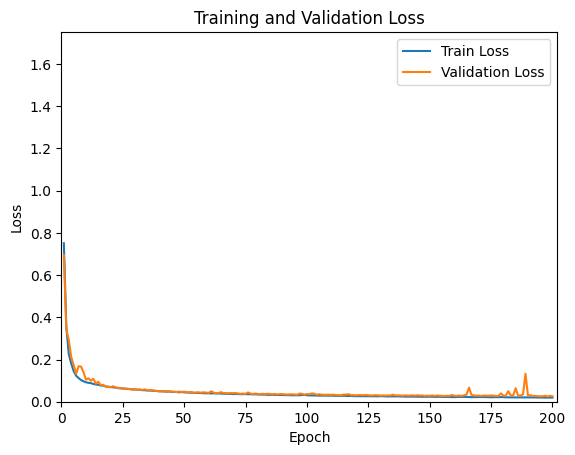

In [5]:
history = deeplab_model.train(drainage_dataloader, config_deeplab, device)

### Saving training callbacks

In [6]:
deeplab_model.save()
print('Saved model')
save_history_callback(deeplab_model, history=history, hyperparams=config_deeplab.get_params())
print('Saved train history')

Saved model
Saved train history
